In [82]:
# Imbalance dataset contains one data in maximum no. and other contains in less nos.

In [83]:
# in this we will make dataset itself


In [84]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

In [85]:
firstclass= pd.DataFrame({'feature1': np.random.normal( loc=0 , scale=1 , size=500),
    'feature2': np.random.normal( loc=0 , scale=1 , size=500),
    'target': 500*[0]})

In [86]:
firstclass

,feature1,feature2,target
0,0.763908,-1.773018,0
1,-0.337505,-0.185530,0
2,-0.861674,-1.357062,0
3,-0.675259,0.984032,0
4,0.320456,-1.363923,0
...,...,...,...
495,-0.916345,-0.372758,0
496,2.347665,0.341202,0
497,-0.562751,0.021611,0
498,0.940542,-0.161798,0


In [87]:
firstclass['feature1'].mean()

-0.027726941083750994

In [88]:
secondclass=pd.DataFrame({
    'feature1': np.random.normal(loc=0 , scale=2 , size=100),
    'feature2': np.random.normal(loc=0 , scale=2 , size=100),
'target': [1]*100})

In [89]:
secondclass

,feature1,feature2,target
0,-2.331612,-1.650028,1
1,-3.986784,1.300633,1
2,1.285831,-0.974427,1
3,0.369419,0.442218,1
4,-1.777056,-0.989522,1
...,...,...,...
95,-0.056762,1.967901,1
96,3.397487,-2.992490,1
97,0.455265,1.714560,1
98,4.352137,-1.786878,1


In [90]:
# now creating a merged table for evaluting the value 

In [91]:
df=pd.concat([firstclass,secondclass])

In [92]:
df

,feature1,feature2,target
0,0.763908,-1.773018,0
1,-0.337505,-0.185530,0
2,-0.861674,-1.357062,0
3,-0.675259,0.984032,0
4,0.320456,-1.363923,0
...,...,...,...
95,-0.056762,1.967901,1
96,3.397487,-2.992490,1
97,0.455265,1.714560,1
98,4.352137,-1.786878,1


<Axes: ylabel='Count'>

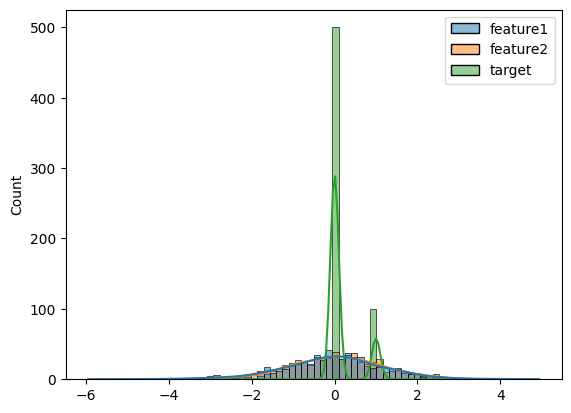

In [93]:
sb.histplot(df, kde=True)

# Here we can se that it is a normal distribution curve

In [94]:
# we can solve it in by two methods by upsampling in that we increase the no. of minoriyt equal to the majority by library of sklearn 

In [95]:
majority= df[df['target']==0]

In [96]:
majority

,feature1,feature2,target
0,0.763908,-1.773018,0
1,-0.337505,-0.185530,0
2,-0.861674,-1.357062,0
3,-0.675259,0.984032,0
4,0.320456,-1.363923,0
...,...,...,...
495,-0.916345,-0.372758,0
496,2.347665,0.341202,0
497,-0.562751,0.021611,0
498,0.940542,-0.161798,0


In [97]:
minority= df[df['target']==1]

In [98]:
minority

,feature1,feature2,target
0,-2.331612,-1.650028,1
1,-3.986784,1.300633,1
2,1.285831,-0.974427,1
3,0.369419,0.442218,1
4,-1.777056,-0.989522,1
...,...,...,...
95,-0.056762,1.967901,1
96,3.397487,-2.992490,1
97,0.455265,1.714560,1
98,4.352137,-1.786878,1


In [99]:
# now upsampling by using sklearn utilis library the its subset resample 

In [100]:
from sklearn.utils import resample

In [101]:
df_resampled= resample(minority, replace=True ,  n_samples= len(majority) , random_state=42)

In [102]:
df_resampled

,feature1,feature2,target
51,2.657190,-1.701983,1
92,0.681348,-1.426318,1
14,1.615121,0.756225,1
71,0.235865,-0.858988,1
60,0.792816,-0.790660,1
...,...,...,...
62,1.904227,-0.280908,1
68,-1.102456,-0.545489,1
21,1.041267,-0.833405,1
92,0.681348,-1.426318,1


In [103]:
Balanced_data= pd.concat([df_resampled , firstclass])

In [104]:
Balanced_data.shape

(1000, 3)

In [105]:
# now plot the grap using matplotlib in dot form

Text(0.5, 1.0, 'Graph Before Sampled')

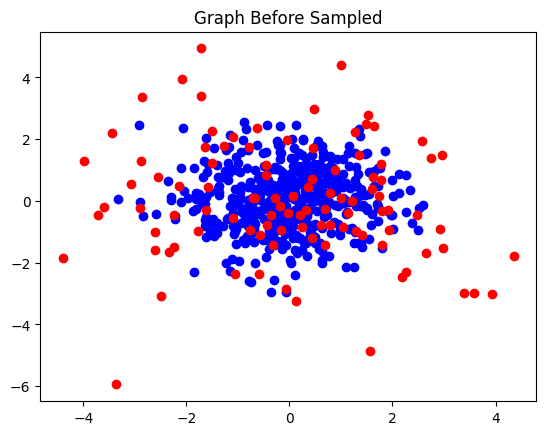

In [117]:
plt.scatter(firstclass['feature1'] , firstclass['feature2'] , color="blue")
plt.scatter(secondclass['feature1'] , secondclass['feature2'] , color="red")
plt.title("Graph Before Sampled")

# graph before resampled

Text(0.5, 1.0, 'Graph After resampled')

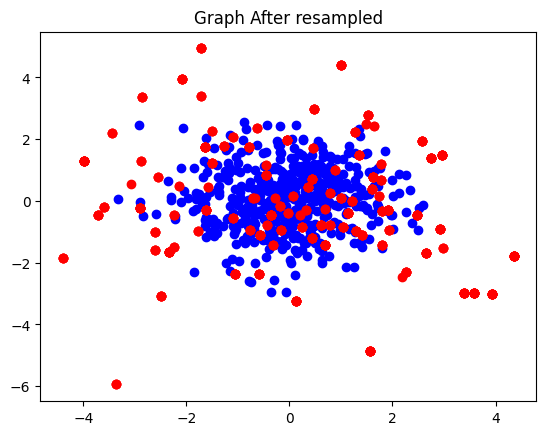

In [120]:
plt.scatter(firstclass['feature1'] , firstclass['feature2'] ,color='blue')
plt.scatter(df_resampled['feature1'] ,df_resampled['feature2'] ,color='red')
plt.title("Graph After resampled")

(500, 3)

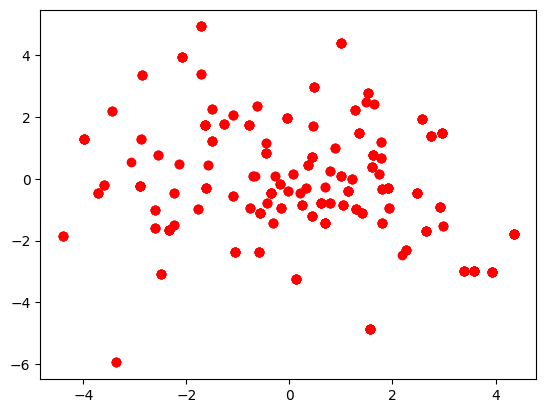

In [128]:

plt.scatter(df_resampled['feature1'] ,df_resampled['feature2'] ,color='red')
df_resampled.shape

(500, 3)

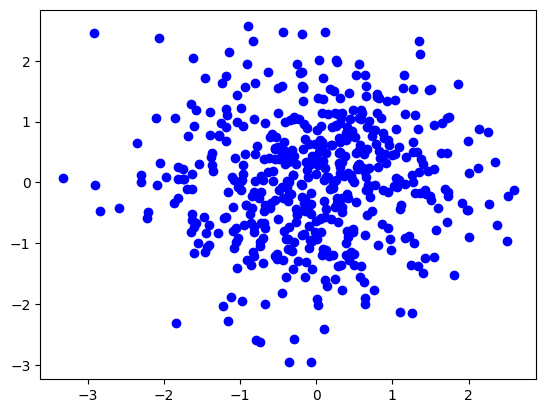

In [127]:
plt.scatter(firstclass['feature1'] , firstclass['feature2'] ,color='blue')
firstclass.shape

In [129]:
# above datasampling is used given by Upsampling 

Now we used different method in which we will attach two points and then calculate no. bewteen it and then resampled it 

# for that we use SMOTE

In [131]:
# we use imblearn library of sklearn

In [132]:
pip install imblearn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [141]:
from imblearn.over_sampling import SMOTE

In [142]:
Oversample=SMOTE()
x,y=Oversample.fit_resample(df[['feature1','feature2']] , df['target']) 

C:\Users\Acer\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
